# Corona Guidelines

- **Do not attend the in-person lab sessions if you have COVID-19 symptoms**
- Report symptoms to the course teachers as well as university immediately
- Wear a mask on public transport
- Wash and/or disinfect your hands before entering the auditorium
- Keep one metre's distance from other students
- Keep two metre's distance from members of the teaching team when they are presenting
- Help the teacher clean backs of chairs and tabletops with disinfectant (spray bottle) and paper towels after lab sessions
- Leave the auditorium in an orderly fashion
- Full COVID-19 guidelines by SCIENCE: https://kunet.ku.dk/faculty-and-department/science/COVID-19/Pages/default.aspx
- Poster with summary of guidelines from SCIENCE: https://kunet.ku.dk/faculty-and-department/science/COVID-19/Documents/app%201%20poster%20generel%20guidelines%20200821.pptx

# Lab Agenda
- Introduction to useful tools for the course
- Tokenization 
- Setting up the course environment

# Introduction to Jupyter 

Jupyter is an open-source web app that combines visualizations, narrative text, mathematical equations, and other rich media in a single document. 

* Creating new notebook - from the menu File -> New Notebook. Once created, you can rename the notebook by clicking on its name and edit its content by adding (plus button), deleting or editing cells.

In [1]:
print("Hello, World!"); # this is a code block

Hello, World!


This is a _Markdown block_ where you can write text. 

You can get help about a method with __(<kbd>Shift</kbd> + <kbd>Tab</kbd>)__
 
__(<kbd>Shift</kbd> + <kbd>Enter</kbd>)__ executes the text/code blocks

While the a code cell is being executed, you'll see a star on the right side of the cell.

In [2]:
!python --version # you can also write shell commands in code blocks

Python 3.6.2


In [3]:
!pip3 install nltk # you can also install new libraries

You should consider upgrading via the 'pip install --upgrade pip' command.


We can also create visualizations and save them.

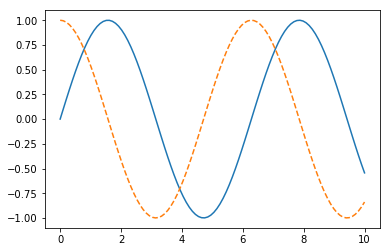

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
x = np.linspace(0, 10, 100)

fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');

In [5]:
fig.savefig('my_figure.png')

In [6]:
import time
%time time.sleep(10) # this is some jupyter magic

CPU times: user 10 ms, sys: 0 ns, total: 10 ms
Wall time: 9.98 s


All Jupyter magic commands are described [here](https://ipython.readthedocs.io/en/stable/interactive/magics.html).

In [7]:
# Magic used in the notebooks : 

# automatically re-load imported modules every time before executing the Python code typed
%load_ext autoreload
%autoreload 2

# automatically include matplotlib plots in the frontend of the notebook and save them with the notebook
%matplotlib inline

### Kernels
Behind every notebook runs a **kernel**. When you run a code cell, that code is executed within the kernel. The kernel is buuild with a specific Python version. Any output is returned back to the cell to be displayed. The kernel’s state persists over time and between cells — it pertains to the document as a whole and not individual cells.

In [8]:
import nltk
nltk.download('punkt')

text = "Time flies like an arrow."

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [9]:
nltk.tokenize.word_tokenize(text)

['Time', 'flies', 'like', 'an', 'arrow', '.']

### Checkpoints

When you create a notebook, a checkpoint file is also saved in a hidden directory called .ipynb_checkpoints. Every time you manually save the notebook (__(<kbd>command</kbd> + <kbd>S</kbd>)__), the checkpoint file updates. Jupyter autosaves your work on occasion, which only updates the .ipynb file but not the checkpoint. You can revert back to the latest checkpoint using File -> Revert to Checkpoint.

### WARNING

Code in Jupyter notebooks can be executed in a non-sequential order. Cells can get deleted.
Notebooks are dangerous unless you run each cell exactly once and sequentially!

To restart the state of the notebook you can select:
**"Kernel -> Restart & Run All"**

This is especially good to do before sharing your notebook with someone else.

References:
- https://www.dataquest.io/blog/jupyter-notebook-tutorial/
- https://nbviewer.jupyter.org/github/cgpotts/cs224u/blob/master/tutorial_jupyter_notebooks.ipynb

---
# Introduction to Colab https://colab.research.google.com/

Colab allows to run notebooks on the Google Cloud with free access to GPUs and TPUs. You can run the same commands reviewed above in Colab as well.

The notebooks can be shared with other people and you can leave comments and control permissions on it.

To run the notebook on GPU/TPU you have to select from the menu Runtime->Change Runtime type, which will be None (CPU) by default.

### Collaboration options:
- Share button in the upper right corner.
- File->Make a Copy creates a copy of the notebook in Drive.
- File->Save saves the File to Drive and pins a version to the checkpoint and you can later restore version from File->Revision history
- GitHub - you can open notebooks hosted in GitHub, this will open a new editable version of the notebook and any changes won't override the GitHub version. If you want to save the changes to GitHub select File->Make a copy to GitHub.



## Using a custom dataset
**The code cells below have to be run in a Colab environment!**
### Uploading files from your local file system
files.upload returns a dictionary of the files which were uploaded. The dictionary is keyed by the file name and values are the data which were uploaded.

In [ ]:
# this code cell has to be run in Colab environment
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

### files.download will invoke a browser download of the file to your local computer.

In [ ]:
from google.colab import files

with open('example.txt', 'w') as f:
  f.write('some content')

files.download('example.txt')

### Mounting Google Drive locally
You can mount your Google Drive in the notebook and use all of the files available there.

In [ ]:
from google.colab import drive
drive.mount('/content/drive') # this will trigger permission prompts

In [ ]:
with open('/content/drive/My Drive/foo.txt', 'w') as f:
  f.write('Hello Google Drive!')
!ls /content/drive/My\ Drive/ | wc -l

In [ ]:
drive.flush_and_unmount()
print('All changes made in this colab session should now be visible in Drive.')

In [ ]:
!pip3 freeze # contains a lot of pre-installed packages

References:
- Colab guides and examples : https://colab.research.google.com/notebooks/intro.ipynb?hl=en
- Integration with GitHub: https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb#scrollTo=WzIRIt9d2huC
- External data handling: https://colab.research.google.com/notebooks/io.ipynb#scrollTo=G5IVmR8S9SeF

----

# Tokenisation

Tokenisation is an important pre-processing step for NLP models. 

You can tokenise text at different levels - split to sentences, tokens, subwords, etc. 

There are a lot of corner cases, language-specific and/or domain-specific cases, which have to handled in different ways.


In [11]:
import re

text_sentences = "The office is open between 10 a.m. and 1 p.m. every day... Please, be respective of the hours."
re.split('(\.|!|\?)', text_sentences)

['The office is open between 10 a',
 '.',
 'm',
 '.',
 ' and 1 p',
 '.',
 'm',
 '.',
 ' every day',
 '.',
 '',
 '.',
 '',
 '.',
 ' Please, be respective of the hours',
 '.',
 '']

Luckily, there are libraries providing tokenization functionalities that handle most of the cases. Let's look two of the most common libraries for tokenisation:

### Spacy

In [12]:
# download the language models, this can be done for other languages as well
!python -m spacy download en_core_web_sm # You might have to restart the notebook if the file cannot be found
!python -m spacy download fr_core_news_sm

You should consider upgrading via the 'pip install --upgrade pip' command.
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
You should consider upgrading via the 'pip install --upgrade pip' command.
✔ Download and installation successful
You can now load the model via spacy.load('fr_core_news_sm')


In [13]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp(text_sentences)
list(doc.sents)

[The office is open between 10 a.m. and 1 p.m. every day...,
 Please, be respective of the hours.]

### NLTK

In [14]:
import nltk

nltk.tokenize.sent_tokenize(text_sentences)

['The office is open between 10 a.m. and 1 p.m. every day...',
 'Please, be respective of the hours.']

#### Word-level tokenization

In [15]:
text = "Mr. O'Neill thinks that the boys' stories about Chile's capital aren't amusing... Good muffins cost $3.88 in New York. Please buy me two of them!!! Thanks.."
text_tweet = "https://t.co/9z2J3P33Uc Hey @NLPer! This is a #NLProc tweet :-D"
noisy_tweet = "UserAnonym123 What's your timezone_!@# !@#$%^&*()_+ 0123456"

print('Common English tokenization')
print(nltk.word_tokenize(text))
print([token.text for token in nlp(text)])

print('\nTweet tokenization')
print(nltk.word_tokenize(text_tweet))
print([token.text for token in nlp(text_tweet)])

print('\nTokenization of a noisy tweet')
print(nltk.word_tokenize(noisy_tweet))
print([token.text for token in nlp(noisy_tweet)])

Common English tokenization
['Mr.', "O'Neill", 'thinks', 'that', 'the', 'boys', "'", 'stories', 'about', 'Chile', "'s", 'capital', 'are', "n't", 'amusing', '...', 'Good', 'muffins', 'cost', '$', '3.88', 'in', 'New', 'York', '.', 'Please', 'buy', 'me', 'two', 'of', 'them', '!', '!', '!', 'Thanks..']
['Mr.', "O'Neill", 'thinks', 'that', 'the', 'boys', "'", 'stories', 'about', 'Chile', "'s", 'capital', 'are', "n't", 'amusing', '...', 'Good', 'muffins', 'cost', '$', '3.88', 'in', 'New', 'York', '.', 'Please', 'buy', 'me', 'two', 'of', 'them', '!', '!', '!', 'Thanks', '..']

Tweet tokenization
['https', ':', '//t.co/9z2J3P33Uc', 'Hey', '@', 'NLPer', '!', 'This', 'is', 'a', '#', 'NLProc', 'tweet', ':', '-D']
['https://t.co/9z2J3P33Uc', 'Hey', '@NLPer', '!', 'This', 'is', 'a', '#', 'NLProc', 'tweet', ':-D']

Tokenization of a noisy tweet
['UserAnonym123', 'What', "'s", 'your', 'timezone_', '!', '@', '#', '!', '@', '#', '$', '%', '^', '&', '*', '(', ')', '_+', '0123456']
['UserAnonym123', 'Wha

Both libraries perform almost similar for tokenising English common text, so it depends which library you'll use for other features. 

When it comes to tweets, the nltk default tokenizer performs bad, but NLTK also provides the TweetTokenizer that is suited for tweet tokenization.

In [16]:
tweet_tokenizer = nltk.tokenize.TweetTokenizer()
print(tweet_tokenizer.tokenize(text_tweet))
print(tweet_tokenizer.tokenize(noisy_tweet))

['https://t.co/9z2J3P33Uc', 'Hey', '@NLPer', '!', 'This', 'is', 'a', '#NLProc', 'tweet', ':-D']
['UserAnonym', '123', "What's", 'your', 'timezone', '_', '!', '@', '#', '!', '@', '#', '$', '%', '^', '&', '*', '(', ')', '_', '+', '0123456']


As you saw, the above tokenizers tokenize negation contractions like "are", "n't", which is per the the Penn Treebank guidelines. Such tokenization can be useful when building sentiment classification or information extraction. 

Question:
- How should we split "I bought a 12-ft boat!"? In 1, 2, or 3 tokens?
- How should we tokenize "It is a 2850m distance flight.", "The maximum speed on the autobahn is 130km/h."? 

There is again a rule that units are split from numerical values. Let's test the performance of the tokenizers:

In [17]:
print('Spacy tokenizer')
print([token.text for token in nlp("I bought a 12-ft boat!")])
print([token.text for token in nlp("It is a 2850m distance flight.")])
print([token.text for token in nlp("The maximum speed on the autobahn is 130km/h.")])

print('\nNLTK simple tokenizer')
print([nltk.tokenize.word_tokenize("I bought a 12-ft boat!")])
print([nltk.tokenize.word_tokenize("It is a 2850m distance flight.")])
print([nltk.tokenize.word_tokenize("The maximum speed on the autobahn is 130km/h.")])

Spacy tokenizer
['I', 'bought', 'a', '12-ft', 'boat', '!']
['It', 'is', 'a', '2850', 'm', 'distance', 'flight', '.']
['The', 'maximum', 'speed', 'on', 'the', 'autobahn', 'is', '130', 'km/h', '.']

NLTK simple tokenizer
[['I', 'bought', 'a', '12-ft', 'boat', '!']]
[['It', 'is', 'a', '2850m', 'distance', 'flight', '.']]
[['The', 'maximum', 'speed', 'on', 'the', 'autobahn', 'is', '130km/h', '.']]


#### Language dependent tokenization

While some languages have similar rules for tokenization, other languages are quite different.
In French, words originally composed of more than one lexical unit that nowadays form a single lexical unit and should thus be recognized as a single token, where an apostrophe should be used to split the word in some cases, but not in all. 

The following sentence "On nous dit qu’aujourd’hui c’est le cas, encore faudra-t-il l’évaluer.", which means "We are told that this is the case today, it still needs to be assessed." has the following correct tokenization:

'On', 'nous', 'dit', 'qu’', 'aujourd’hui', 'c’', 'est', 'le', 'cas', ',', 'encore', 'faudra', '-t-il', 'l’', 'évaluer', '.'

Explanation:
- words originally composed of more than one lexical unit that nowadays form a single lexical unit and should thus be recognized as a single token like 'aujourd’hui'
- qu’aujourd’hui (that today) - today is in contracted form (qu’) and has to be separated from the rest of the word
- c'est (this is) is ce (C') combined with est and has to be split in two words
- l’évaluer (evaluate it) is two words, where one is in contracted form and has to be separated
- faudra-t-il (will it take) - consists of will (faudra), -t is used to prevent two vowels from clashing and should not be tokenized

In [18]:
print([nltk.tokenize.word_tokenize("On nous dit qu’aujourd’hui c’est le cas, encore faudra-t-il l’évaluer.")])
print([token.text for token in nlp("On nous dit qu’aujourd’hui c’est le cas, encore faudra-t-il l’évaluer.")])

[['On', 'nous', 'dit', 'qu', '’', 'aujourd', '’', 'hui', 'c', '’', 'est', 'le', 'cas', ',', 'encore', 'faudra-t-il', 'l', '’', 'évaluer', '.']]
['On', 'nous', 'dit', 'qu’aujourd’hui', 'c’est', 'le', 'cas', ',', 'encore', 'faudra', '-', 't', '-', 'il', 'l’évaluer', '.']


Let's use the language-specific tokenization:

In [19]:
nlp_fr = spacy.load("fr_core_news_sm")
print([token.text for token in nlp_fr("On nous dit qu’aujourd’hui c’est le cas, encore faudra-t-il l’évaluer.")])
nltk.tokenize.word_tokenize("On nous dit qu’aujourd’hui c’est le cas, encore faudra-t-il l’évaluer.", language='french')

['On', 'nous', 'dit', 'qu’', 'aujourd’', 'hui', 'c’', 'est', 'le', 'cas', ',', 'encore', 'faudra', '-', 't', '-', 'il', 'l’', 'évaluer', '.']


['On',
 'nous',
 'dit',
 'qu',
 '’',
 'aujourd',
 '’',
 'hui',
 'c',
 '’',
 'est',
 'le',
 'cas',
 ',',
 'encore',
 'faudra-t-il',
 'l',
 '’',
 'évaluer',
 '.']

#### References:
- Introduction to Spacy and its features: https://spacy.io/usage/spacy-101
- NLTK tokenization functionalities: https://www.nltk.org/api/nltk.tokenize.html
- On rules and different languages: http://ceur-ws.org/Vol-2226/paper9.pdf
- Why do we need language-specific tokenization: https://stackoverflow.com/questions/17314506/why-do-i-need-a-tokenizer-for-each-language

----- 

# stat-nlp-book setup

## On your personal computer

Go to https://github.com/copenlu/stat-nlp-book and follow the readme to set up the stat-nlp-book.

## On Microsoft Azure

If you feel adventurous, and want to set up your own Virtual Machine with stat-nlp-book, follow the [Azure tutorial](../tutorials/azure_tutorial.ipynb)

# Additional Info

## Docker commands
* Get a list of the currently running containers <br> 
<code>docker ps -q</code> <br>
* Run shell commands in your container by first getting the id of the container with above command and then: <br>
<code>docker exec -it _container-id_ _command_</code> <br>
e.g. <code>docker exec -it 8c16b8de4771 python --version</code>


## Managing your changes

There are several ways to keep your changes within the official repo organised. Some of them are:
* Create your own [fork](https://help.github.com/en/articles/fork-a-repo)
of the repo. The fork can be [synced](https://help.github.com/en/articles/syncing-a-fork?query=f) with the official course repo when new changes are available. Meanwhile, you can also maintain your changes in your forked repo.
* Another option is to keep your changes only in a local branch (<code>git checkout -b _your-branch-name_</code>) on your computer. Each time there is a change in the course repo, you can pull the repo and merge the changes in your branch (<code>git merge origin/master</code>)

-----

# Python tutorials

* Go thoutgh this [Notebook](../exercises/python_intro.ipynb) with elementary Python syntax.

* [An Informal Introduction to Python](https://docs.python.org/3/tutorial/introduction.html)

* [Python for Beginners](https://www.python.org/about/gettingstarted/)

* [Learn Python in 10 minutes](https://www.stavros.io/tutorials/python/)

* [LOADS of others](https://www.google.co.uk/search?q=python+tutorial)